# Topic: Cross Validation in predictive modeling


## Problem

When you do `train-test-split` you are sampling randomly to identify the train and test datasets.

![img](train-test-examp.png)

But what about **sampling error**? What if you get a **BAD SAMPLE**?!

![bad](https://media.giphy.com/media/cJjQJWU70DSuHzx4oR/giphy.gif)

## Our Task
![map](map.png) 

Build a multivariate Ordinary Least Squares regression model to predict "TARGET_deathRate"with a more robust model validation method, cross-validation.<br>
We have data aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. Most of the data preparation process can be viewed here.


## Learning Goals:

- Describe the elements of  K-fold Cross validation 
- Recognize how K-fold cross validation is superior to normal validation testing
- Apply K-fold cross validation to a dataset
- Apply K-fold cross validation to Module 1 project 

## Activation
Let us talk about `training` and `testing.`

![train-test](why-train-test.png)

We split to prevent:

![fit-pit](overfit_underfit.png)
(found on [this blog](https://rmartinshort.jimdo.com/2019/02/17/overfitting-bias-variance-and-leaning-curves/)). 

But what if by random chance of your training dataset split - your training data isn't representative? what if it includes some wacky data?

![but what if](bad-split.png)

k-fold averages that out, and also keeps from “overfitting” and “underfitting.”


## Learning Goal 1: Describe the elements of K-fold Cross validation 

In the context of modeling, K-fold cross validation sits under the Stage 6- Predictive Modeling, in the 7 stage Data Science Lifecycle.

![chart](chart.png)

K-fold cross validation essentially helps us increase the accuracy of any Machine learning model. It does this by taking the average of the results of training and testing data from given dataset. This in turn is by dividing the dataset into several (“k”) folds. Then, Training data on “k-1” folds and testing on “kth” fold. Repeat this “k” times and average the result.

![cross-val](cross-val-graphic.png)
(graphic from [here](https://towardsdatascience.com/cross-validation-70289113a072) )

We can compare the resultant accuracy by taking the average of accuracy calculated during each of the folds. This tends to give a more real picture of the machine learning model performance. 

The cross validation technique can be used to compare the performance of different machine learning models on the same data set. To understand this point better, let us consider the following example.

Go through [this blog](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79) to hit the topic home.

## Learning Goal 2:  Explain to Rob
![img2](thinking.jpeg)

You've hired Rob to build models for you. He's stressed and trying to tell you there isn't enough time to do a cross validation and that one train-test split should be enough.

Write down what you would say to Greg and then tell it to your neighbor.

## Learning Goal 3: Applying k-fold cross validation

### Try the code in each of these articles:

### One half of room:
This is a good tech blog:

[this blog is a good one](https://machinelearningmastery.com/k-fold-cross-validation/)

### Other half of room:
[another good example](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833)


### Task: 
Write the most important  parts of code from each post on the board & then discuss

- What did you need to specify?
- What new libraries did you use?

In [53]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [42]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [43]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [44]:
predictions[0:5]

array([157.26280384, 164.43254905, 107.46557733, 140.83336572,
       192.74804392])

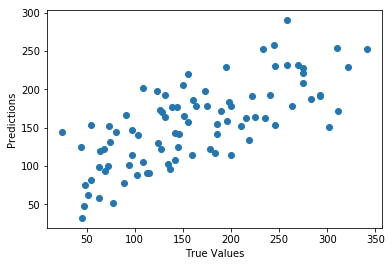

In [47]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [51]:
print("Score:", model.score(X_test, y_test))

Score: 0.5059992356561451


In [55]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [57]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### Assessment

Did they achieve all the learning goals from the start? How do you confirm? You can use many different methods:

Review questions? (make into quiz)

- What is “training” and “testing” 
- What is underfitting?
- What is overfitting?
- What is the data science lifecycle? (students should be able to articulate the 7 steps in the - pie chart above)
- What is k-fold cross validation?


Why is it useful?

### Reflection/Key Takeaways


In machine learning, it is always a good idea to play around with different predictive models and their parameters to arrive at the best choice. Fine-tuning your machine learning model is helpful in achieving good results, and of course, cross validation helps you know if you are on the right track to get a good predictive model.


_Limitations of Cross Validation_ <br>
For cross validation to give some meaningful results, the training set and the validation set are required to be drawn from the same population. Also, human biases need to be controlled, or else cross validation will not be fruitful.

_**Other Applications**_

_Compare Performance_<br>
Suppose you want to make a classifier for the MNIST data set, which consists of hand-written numerals from 0 to 9. You are considering using either K Nearest Neighbours (KNN) or Support Vector Machine (SVM). To compare the performance of the two machine learning models on the given data set, you can use cross validation. This will help you determine which predictive model you should choose working with for the MNIST data set.
Cross validation can also be used for selecting suitable parameters. The example mentioned below will illustrate this point well.

_Fine-tune Parameters_<br>
Suppose you have to build a K Nearest Neighbours (KNN) classifier for the MNIST data set. To use this classifier, you should provide an appropriate value of the parameter k to the classifier. Choosing the value of k intuitively is not a good idea (beware of overfitting!). You can play around with different values of the parameter k and use cross validation to estimate the performance of the predictive model corresponding to each k. You should finally go ahead with the value of k that gives the best performance of the predictive model on the given data set.
For the K Nearest Neighbours (KNN) classifier, you can even choose different metrics (default is ‘minkowski’ if you use ‘KNeighborsClassifier’ of sklearn). So you can use cross validation to determine which metric is the best for the data set you have.

_References_
- https://machinelearningmastery.com/k-fold-cross-validation/
- https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79
- https://www.researchgate.net/post/What_is_the_purpose_of_performing_cross-validation
- https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833
- https://www.cs.tau.ac.il/~nin/Courses/NC05/pr_l13.pdf
- https://magoosh.com/data-science/k-fold-cross-validation/

# For practice!

## Build model to predict cancer


```
cancer_rates = pd.read_csv('https://query.data.world/s/5ylxfjp6oymzhuhhzwmlbqxzcw6etz')

households = pd.read_csv('https://download.data.world/s/3nopgtdm2fwjgidovkostutkfitlps')
```

[Here is the documentation](https://data.world/exercises/linear-regression-exercise-1/workspace/data-dictionary) for this data.

Integrate this new knowledge of k-fold cross validation to build a model and calculate the average performance. 